In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
data=pd.read_csv("Billionaire.csv")
data.head()
# data.describe()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


preprocessing

ببینیم مقدار نال دارد یا نه

In [138]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

حذف 79 نفر

In [139]:
data=data.dropna()

In [140]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

remove (B) & ($) from Networth column

In [141]:
data["NetWorth"]=data["NetWorth"].str.strip("$")
data["NetWorth"]=data["NetWorth"].str.strip("B")
data["NetWorth"]=data["NetWorth"].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


*****process*****

In [142]:
df=data.sort_values(by=["NetWorth"],ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


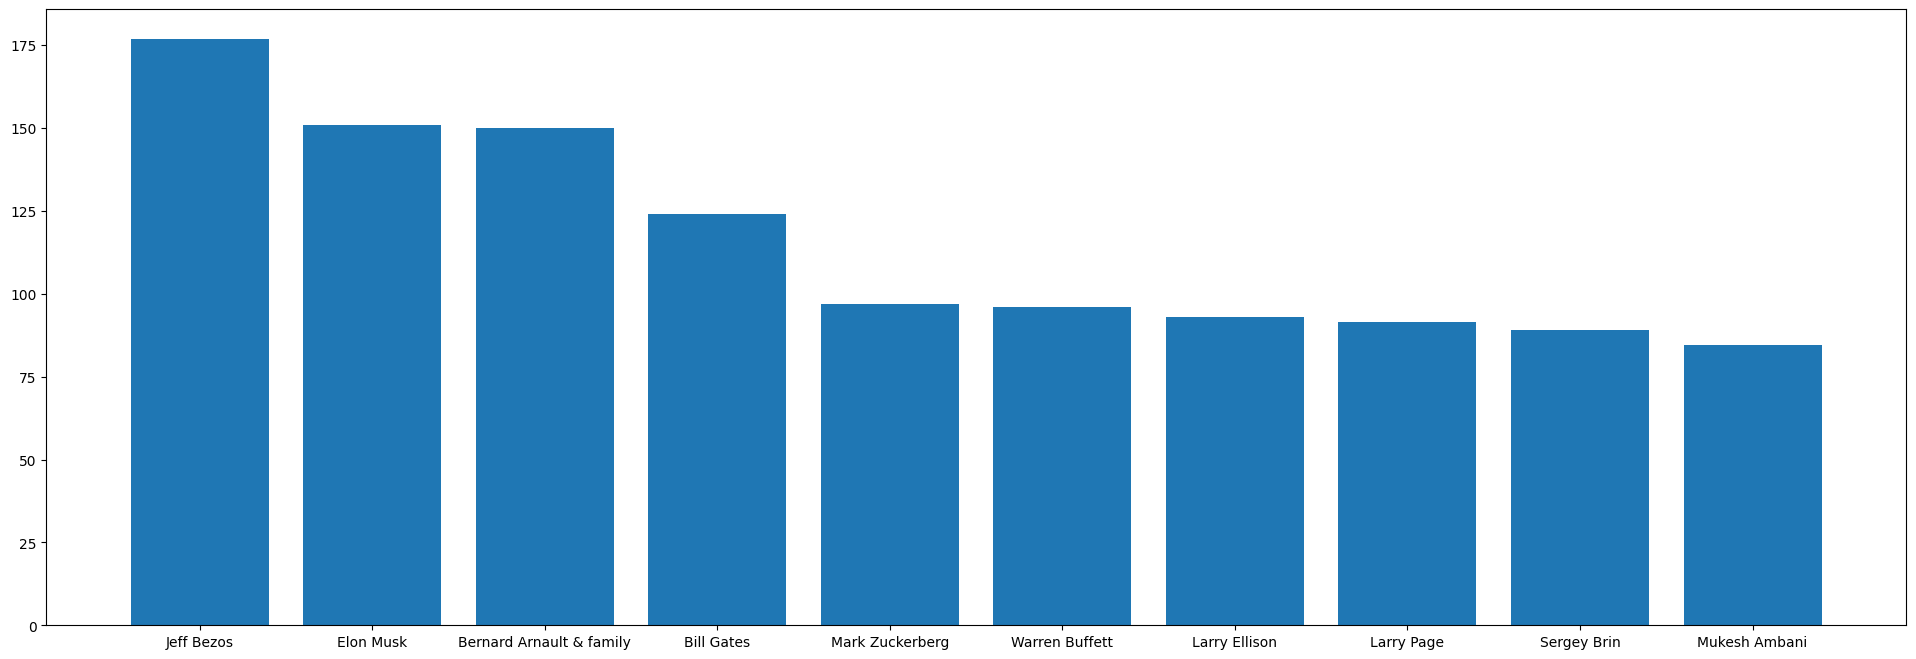

In [143]:
plt.figure(figsize=(24,8))
plt.bar(df["Name"],df["NetWorth"])
plt.show()

In [144]:
df=data["Source"].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


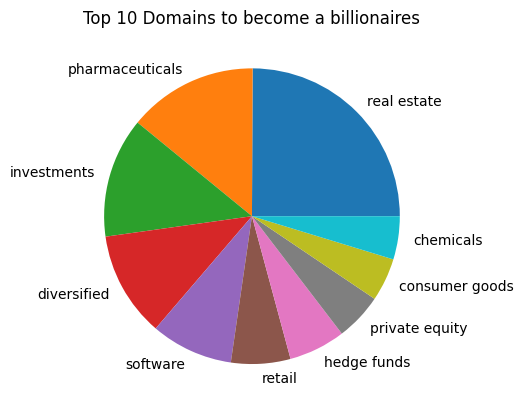

In [145]:
plt.pie(df["count"], labels=df["Source"])
plt.title("Top 10 Domains to become a billionaires")
plt.show()

In [146]:
df= data["Industry"].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


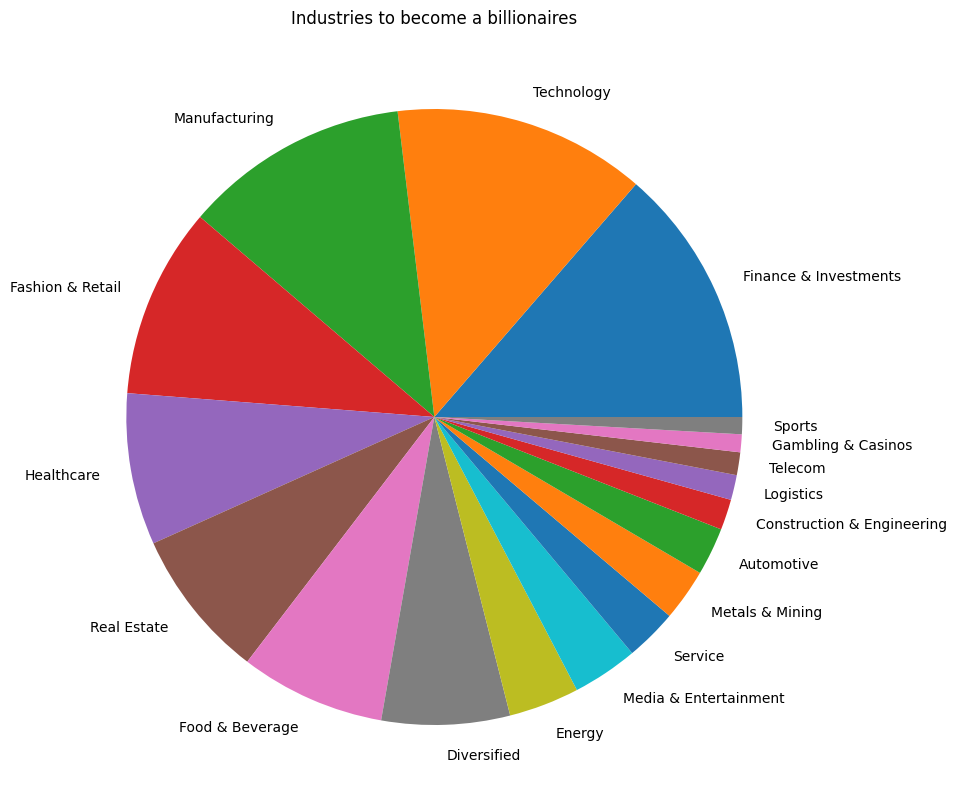

In [147]:
plt.figure(figsize=(24,10))
plt.pie(df["count"], labels=df["Industry"])
plt.title("Industries to become a billionaires")
plt.show()

In [148]:
df= data["Country"].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


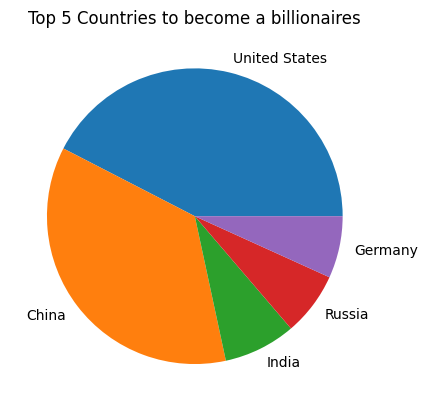

In [149]:
plt.pie(df["count"], labels=df["Country"])
plt.title("Top 5 Countries to become a billionaires")
plt.show()

In [150]:
age_mean=data['Age'].mean()
age_var=data['Age'].var()
print("age_mean= ",age_mean)
print("age_var= ",age_var)

age_mean=  63.1136023916293
age_var=  180.7721364011008


In [151]:
df=data.groupby('Country')['NetWorth'].sum().reset_index()
df

,Country,NetWorth
0,Algeria,4.8
1,Argentina,9.2
2,Australia,176.7
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,196.5
66,United States,4384.7
67,Venezuela,3.2
68,Vietnam,16.7


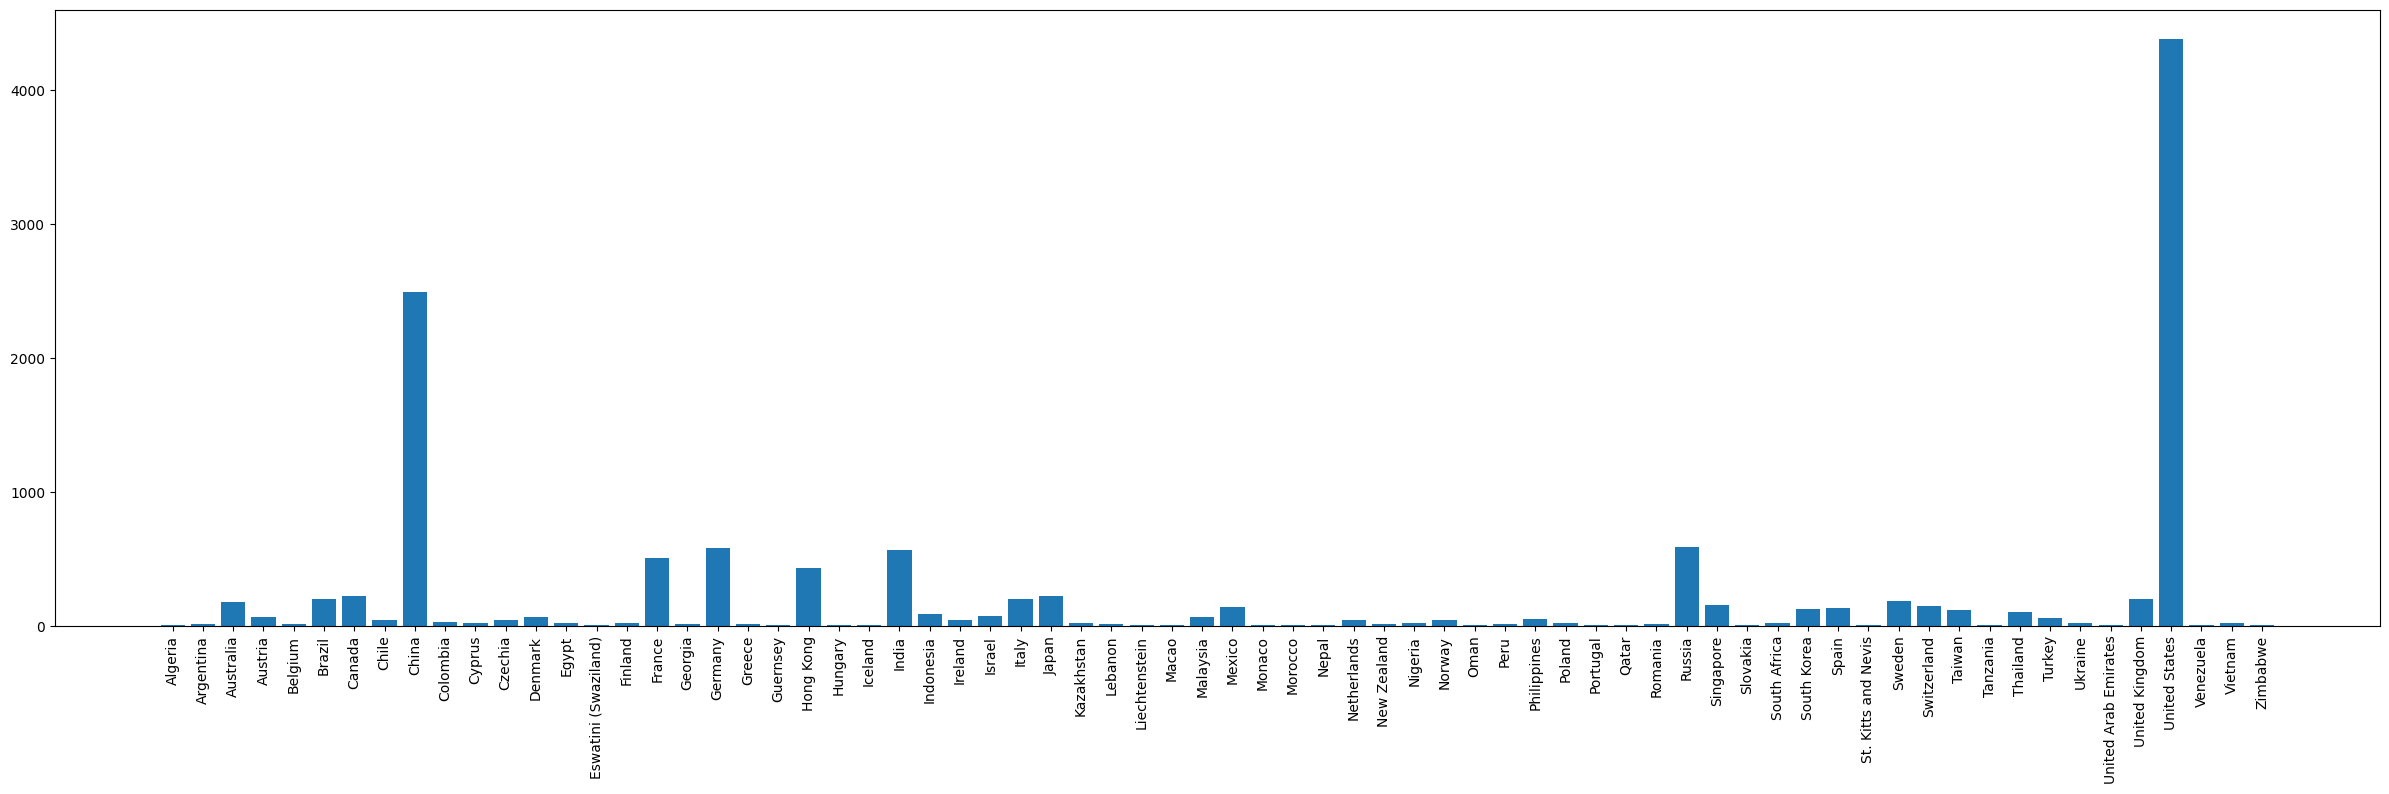

In [152]:
plt.figure(figsize=(30,8))
plt.bar(df['Country'],df['NetWorth'])
plt.xticks(rotation=90)
plt.show()

In [153]:
df_10top_En=data.query("Country=='United States'").sort_values(by="NetWorth",ascending=False).head(10).reset_index(drop=True)
df_10top_En

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,Larry Page,91.5,United States,Google,8,48.0,Technology
7,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


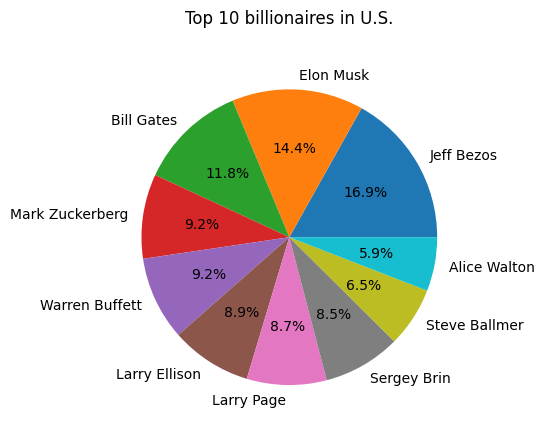

In [154]:
plt.pie(df_10top_En["NetWorth"],labels=df_10top_En["Name"],autopct="%1.1f%%")
plt.title("Top 10 billionaires in U.S.\n")
plt.show()

In [155]:
min_no_billionaires_in_country=data['Country'].value_counts().tail(10).reset_index()
min_no_billionaires_in_country

,Country,count
0,Tanzania,1
1,Guernsey,1
2,Oman,1
3,United Arab Emirates,1
4,Macao,1
5,Venezuela,1
6,Eswatini (Swaziland),1
7,Algeria,1
8,Liechtenstein,1
9,Nepal,1


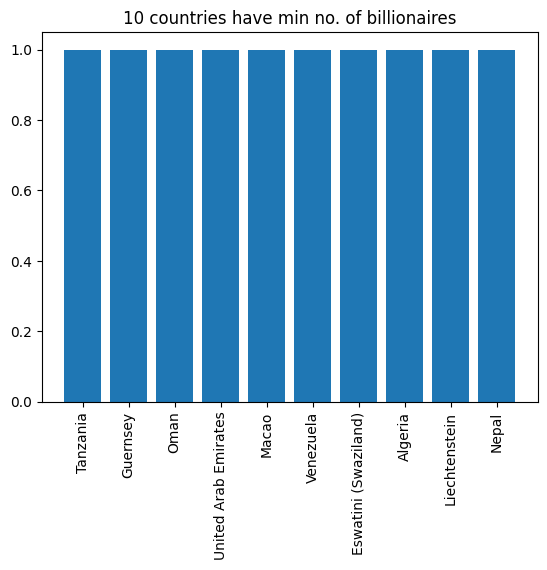

In [156]:
plt.bar(min_no_billionaires_in_country['Country'],min_no_billionaires_in_country['count'])
plt.title("10 countries have min no. of billionaires")
plt.xticks(rotation=90)
plt.show()